In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICE'] = ''
import random

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.iam_paragraphs import IAMParagraphs
from text_recognizer.data.iam_synthetic_paragraphs import IAMSyntheticParagraphs
from text_recognizer.data.iam_extended_paragraphs import IAMExtendedParagraphs

In [49]:
def _plot(image, figsize=(12,12), title='', vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    if title:
        plt.title(title)
    plt.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)

def convert_y_label_to_string(y, mapping, padding_index=3):
    return ''.join([mapping[int(i)] for i in y if i != padding_index])

In [3]:
from hydra import compose, initialize
from omegaconf import OmegaConf
from hydra.utils import instantiate

In [31]:
# context initialization
with initialize(config_path="../training/conf/", job_name="test_app"):
    cfg = compose(config_name="config", overrides=["mapping=emnist"])
    print(OmegaConf.to_yaml(cfg))
    print(cfg)

callbacks:
  model_checkpoint:
    _target_: pytorch_lightning.callbacks.ModelCheckpoint
    monitor: val/loss
    save_top_k: 1
    save_last: true
    mode: min
    verbose: false
    dirpath: checkpoints/
    filename: '{epoch:02d}'
  learning_rate_monitor:
    _target_: pytorch_lightning.callbacks.LearningRateMonitor
    logging_interval: step
    log_momentum: false
  watch_model:
    _target_: callbacks.wandb_callbacks.WatchModel
    log: all
    log_freq: 100
  upload_code_as_artifact:
    _target_: callbacks.wandb_callbacks.UploadCodeAsArtifact
    project_dir: ${work_dir}/text_recognizer
  upload_ckpts_as_artifact:
    _target_: callbacks.wandb_callbacks.UploadCheckpointsAsArtifact
    ckpt_dir: checkpoints/
    upload_best_only: true
  log_text_predictions:
    _target_: callbacks.wandb_callbacks.LogTextPredictions
    num_samples: 8
criterion:
  _target_: text_recognizer.criterions.label_smoothing.LabelSmoothingLoss
  smoothing: 0.1
  ignore_index: 1000
datamodule:
  _target

In [41]:
cfg.datamodule.word_pieces = False

In [52]:
datamodule = instantiate(cfg.datamodule, mapping=cfg.mapping)
datamodule.prepare_data()
datamodule.setup()
print(datamodule)

2021-08-03 19:11:47.244 | INFO     | text_recognizer.data.iam_paragraphs:setup:97 - Loading IAM paragraph regions and lines for None...
2021-08-03 19:12:09.949 | INFO     | text_recognizer.data.iam_synthetic_paragraphs:setup:68 - IAM Synthetic dataset steup for stage None...


IAM Original and Synthetic Paragraphs Dataset
Num classes: 84
Dims: (1, 576, 640)
Output dims: (682, 1)
Train/val/test sizes: 19958, 262, 231
Train Batch x stats: (torch.Size([4, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0114), tensor(0.0515), tensor(0.9961))
Train Batch y stats: (torch.Size([4, 682]), torch.int64, tensor(1), tensor(83))
Test Batch x stats: (torch.Size([4, 1, 576, 640]), torch.float32, tensor(0.), tensor(0.0321), tensor(0.0744), tensor(0.8118))
Test Batch y stats: (torch.Size([4, 682]), torch.int64, tensor(1), tensor(83))



In [ ]:
dataset = IAMExtendedParagraphs(batch_size=1, word_pieces=True)
dataset.prepare_data()
dataset.setup()
print(dataset)

In [15]:
len(datamodule.mapping)

1006

In [ ]:
dataset = IAMParagraphs()
dataset.prepare_data()
dataset.setup()
print(dataset)

In [53]:
x, y = next(iter(datamodule.test_dataloader()))

In [ ]:
x.shape

In [ ]:
x, y = dataset.data_train[0]

In [ ]:
x.shape

In [ ]:
y[

In [ ]:
len(y)

In [45]:
datamodule.mapping.get_index("<p>")

tensor([3])

In [54]:
convert_y_label_to_string(y[0], datamodule.mapping, padding_index=3)

'<s>He rose from his breakfast-nook bench\nand came into the livingroom, where\nHeather and Steve stood aghast at\nhis entrance. He came, almost falling\nforward in an ungainly shuffle, neck\nthrust out, arms dangling loosely.\nThen, abruptly, he drew himself up\nand walked on the very tips of\nhis toes. He stretched his arms\nover his head and yawned agape,\ndrawing-in great breaths that\nbecame great sighs of ecstacy.<e>'

In [ ]:
x.shape

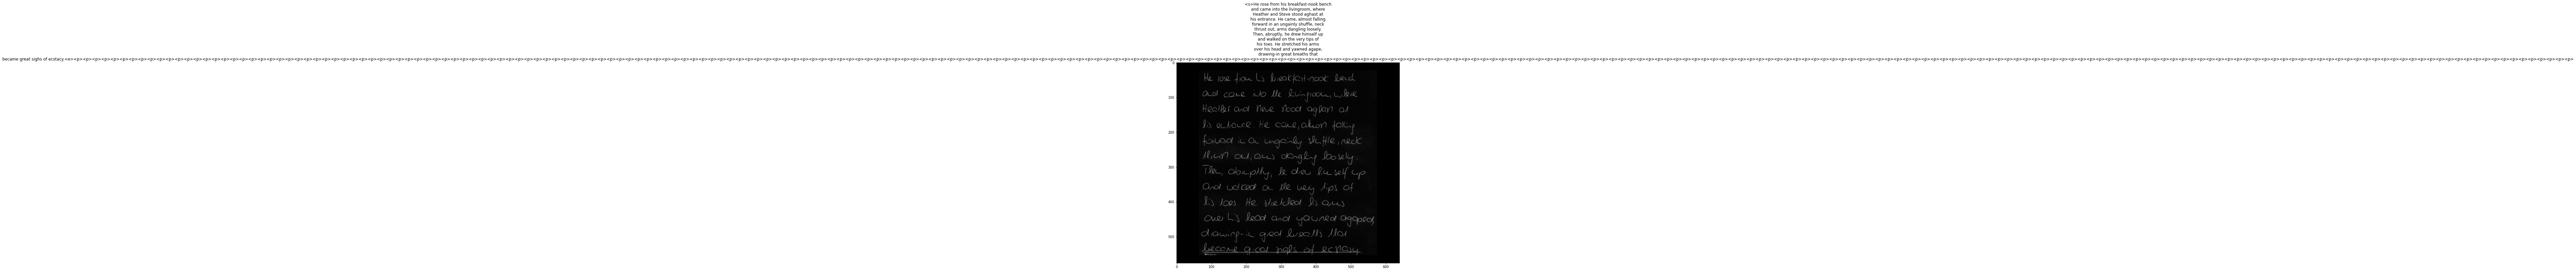

In [55]:
_plot(x[0, 0], vmax=1, title=datamodule.mapping.get_text(y[0]))

In [21]:
datamodule.mapping["<p>"]

tensor([1000])

In [20]:
y[0]

tensor([1002,   25,  147,  233,   88,   16,   45,    1,   61,   54,    7,   20,
          95,   71,   20,    2,   15,   30,   21,   24,   24,   95,   18,   21,
          78, 1001,   14,  779,    7,    1,  218,    3,    1,   36,   23,   64,
          23,   21,   46,   54,   24,   24,   16,    4,    1,  542, 1001,    1,
          47,    7,   20,   15,   47,    7,   54,   14,    1,    2,   15,    7,
          64,    7,   99,  281,    1,   20,   46,   47,   20,    2,   15,   80,
        1001,   45,    1,    7,   21,   15,   54,   20,   21,   31,    7,   33,
          25,    1,   31,   20,   16,    7,    4,    1,   28,  744,  489,   12,
        1001,   35,  362,   11,   67,    1,   41,   21,   46,   20,   23,   21,
          36,   13,    1,    2,   47,   41,   71,   71,   36,    7,    4,    1,
         120,  155, 1001,   22,   54,   41,   66,    1,   24,   41,   15,    4,
         673,    2,    1,   17,   20,   21,   46,   36,   23,   21,   46,    1,
          36,   24,   24,    2,    7,   

In [18]:
_plot(x[0, 0], vmax=1, title=convert_y_label_to_string(y[0], datamodule.mapping))

TypeError: 'int' object is not iterable

In [ ]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
from einops import rearrange

In [ ]:
x, y = dataset.data_train[2]

In [ ]:
_plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
p = 32
patches = rearrange(x.unsqueeze(0), 'b c (h p1) (w p2) -> b c (h w) p1 p2', p1 = p, p2 = p)

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(15):
    ax = fig.add_subplot(1, 15, i + 1)
    ax.imshow(patches[0, 0, i + 160, :, :].squeeze(0), cmap='gray')

In [ ]:
# Testing

for _ in range(5):
    i = random.randint(0, len(dataset.data_test))
    x, y = dataset.data_test[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))

In [ ]:
dataset = IAMSyntheticParagraphs()
dataset.prepare_data()
dataset.setup()
print(dataset)

In [ ]:
# Training

for _ in range(5):
    i = random.randint(0, len(dataset.data_train))
    x, y = dataset.data_train[i]
    _plot(x[0], vmax=1, title=convert_y_label_to_string(y, dataset.mapping))